**ResNet50**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.applications import resnet
from keras.layers import Flatten , Dense , Activation
from keras import optimizers , Sequential
from keras.optimizers import Adam
from keras import models , layers
from keras.layers import Input
from keras.models import Model
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
train_path='/content/gdrive/MyDrive/Dataset/train'
val_path='/content/gdrive/MyDrive/Dataset/val'
test_data='/content/gdrive/MyDrive/Dataset/test'

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(
    directory = train_path,
    image_size =(224,224),
    batch_size = 32,
    label_mode = "categorical",
    seed = 43
)

Found 994 files belonging to 4 classes.


In [ ]:
val_data = tf.keras.utils.image_dataset_from_directory(
    directory = val_path,
    image_size =(224,224),
    batch_size = 32,
    label_mode = "categorical",
    seed = 43
)

Found 343 files belonging to 4 classes.


In [ ]:
test_data = tf.keras.utils.image_dataset_from_directory(
    directory = test_data,
    image_size =(224,224),
    batch_size = 32,
    label_mode = "categorical",
    seed = 43
)

Found 184 files belonging to 4 classes.


In [ ]:
resnet= tf.keras.applications.ResNet50(
                   include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',
                   classes=4,
                   weights='imagenet')

for each_layer in resnet.layers:
        each_layer.trainable=False

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()
model.add(resnet)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 4)                 516       
                                                                 
Total params: 24,801,540
Trainable params: 1,213,828
Non

In [ ]:
model.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_data,
                    validation_data=val_data,
                    epochs=100)

Epoch 1/100
32/32 [==============================] - 154s 4s/step - loss: 0.8355 - accuracy: 0.6851 - val_loss: 0.5285 - val_accuracy: 0.8251
Epoch 2/100
32/32 [==============================] - 5s 143ms/step - loss: 0.3659 - accuracy: 0.8984 - val_loss: 0.3585 - val_accuracy: 0.8746
Epoch 3/100
32/32 [==============================] - 6s 167ms/step - loss: 0.2379 - accuracy: 0.9376 - val_loss: 0.2839 - val_accuracy: 0.8980
Epoch 4/100
32/32 [==============================] - 5s 143ms/step - loss: 0.1442 - accuracy: 0.9678 - val_loss: 0.2279 - val_accuracy: 0.9359
Epoch 5/100
32/32 [==============================] - 6s 178ms/step - loss: 0.0955 - accuracy: 0.9869 - val_loss: 0.2009 - val_accuracy: 0.9329
Epoch 6/100
32/32 [==============================] - 5s 148ms/step - loss: 0.0651 - accuracy: 0.9930 - val_loss: 0.1791 - val_accuracy: 0.9388
Epoch 7/100
32/32 [==============================] - 6s 177ms/step - loss: 0.0452 - accuracy: 0.9970 - val_loss: 0.1713 - val_accuracy: 0.9475


In [ ]:
model.evaluate(test_data)

6/6 [==============================] - 21s 283ms/step - loss: 0.2387 - accuracy: 0.9565


[0.23865555226802826, 0.95652174949646]

In [ ]:
classes = ["cp", "me", "mp", "nl"]
name = "ResNet50 Confusion matrix"

In [ ]:
def plot_confusion_matrix(cm,
                          classes,
                          name,
                          cmap,
                          normalize=False,
                          title='ResNet50 Confusion matrix'):

    #plt.figure(figsize=(6,3))
    plt.subplot(1,3,3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(name)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, weight = 'bold')
    plt.yticks(tick_marks, classes, weight = 'bold')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Labels', fontweight='bold')
    plt.xlabel('Predicted Labels', fontweight='bold')


In [ ]:
def create_confusion_matrix(cm_plot_labels, name, y_true,y_pred, map_col):
    #Get the true and predicted labels
    y_predict_classes, y_true_classes = y_pred,y_true

    #Compute the confusion matrix
    confusion_matrix_computed = confusion_matrix(y_true_classes, y_predict_classes)

    #Plot the confusion matrix
    plot_confusion_matrix(confusion_matrix_computed, cm_plot_labels, name, map_col)
    # plot_confusion_matrix(conf_mat=confusion_matrix_computed, class_names=cm_plot_labels)


In [ ]:
predictions = np.array([])
labels =  np.array([])
for x, y in test_data:
  predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis = -1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])



1/1 [==============================] - 0s 44ms/step


<ipython-input-38-bb4e1ef39777>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


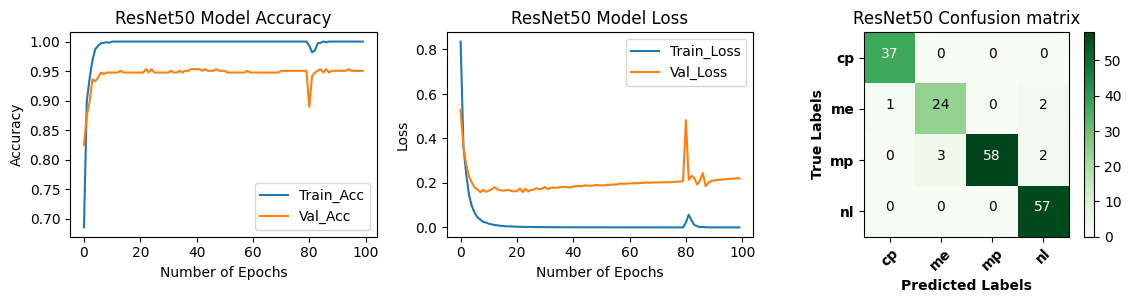

In [ ]:
import keras
from matplotlib import pyplot as plt

plt.subplots(figsize=(11.5,3))
plt.subplot(1,3,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ResNet50 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['Train_Acc', 'Val_Acc'], loc='lower right')

plt.subplot(1,3,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ResNet50 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['Train_Loss', 'Val_Loss'], loc='upper right')

create_confusion_matrix(classes, name, labels, predictions, 'Greens')